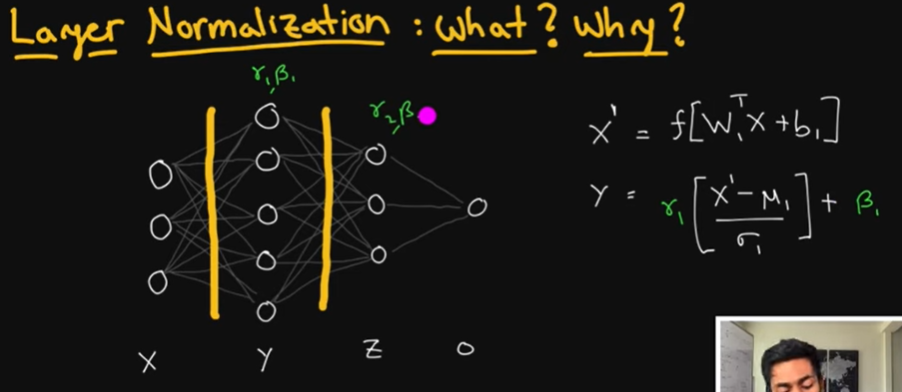
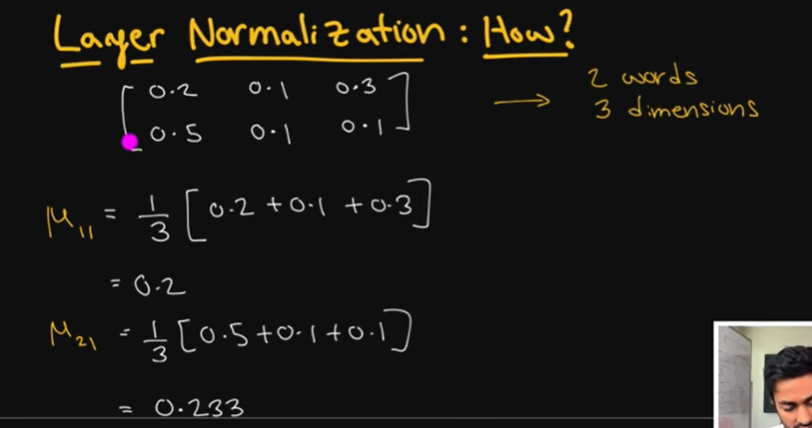
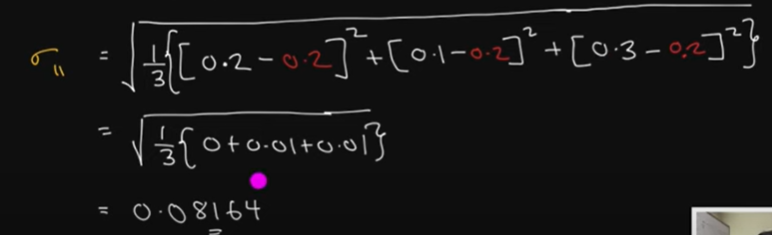
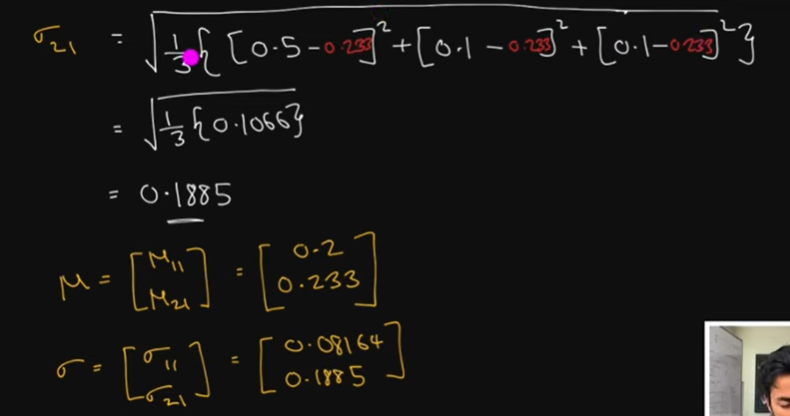
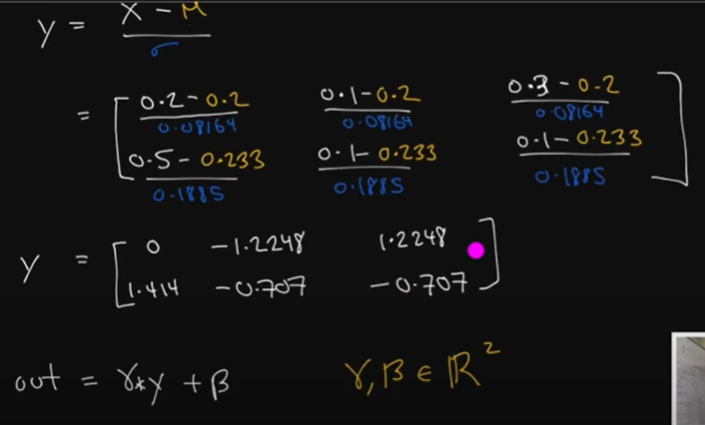

### Now the y value mean is zero and standard deviation is close to one. Now the values are much more stable during training

In [2]:
import torch
from torch import nn

In [3]:
inputs = torch.Tensor([[[0.2, 0.1, 0.3], [0.5, 0.1, 0.1]]])
B, S, E = inputs.size()
inputs = inputs.reshape(S, B, E)
inputs.size()

torch.Size([2, 1, 3])

### We will normalize whole batch so the size of gamma and beta are 2 dimensional

In [49]:
parameter_shape = inputs.size()[-2:]
gamma = nn.Parameter(torch.ones(parameter_shape))
beta = nn.Parameter(torch.zeros(parameter_shape))

In [5]:
gamma.size(), beta.size()

(torch.Size([1, 3]), torch.Size([1, 3]))

In [6]:
dims = [-(i+1) for i in range(len(parameter_shape))]
dims

[-1, -2]

In [8]:
mean = inputs.mean(dim=dims, keepdim=True)
mean.size()

torch.Size([2, 1, 1])

### We are adding small value epsilon, so that the std value will not be zero in any case. In next step we are dividing std, it should not be 0

In [42]:
var = ((inputs - mean) ** 2).mean(dim=dims, keepdim=True)
epsilon = 1e-5
std = (var + epsilon).sqrt()
std

tensor([[[0.0817]],

        [[0.1886]]])

In [45]:
y = (inputs-mean) / std
y

tensor([[[ 0.0000, -1.2238,  1.2238]],

        [[ 1.4140, -0.7070, -0.7070]]])

In [47]:
out = y * gamma + beta
out

tensor([[[ 0.0000, -1.2238,  1.2238]],

        [[ 1.4140, -0.7070, -0.7070]]], grad_fn=<AddBackward0>)

In [50]:
class LayerNormalization():
    def __init__(self, parameter_shape, eps=1e-5) :
        self.parameter_shape = parameter_shape
        self.eps = eps
        self.gamma = nn.Parameter(torch.ones(parameter_shape))
        self.beta = nn.Parameter(torch.zeros(parameter_shape))

    def forward(self, input):
        dims = [-(i+1) for i in range(len(self.parameter_shape))]
        mean = input.mean(dim=dims, keepdim=True)
        print(f"Mean \n ({mean.size()}) : \n {mean}")
        var = ((input - mean) ** 2).mean(dim=dims, keepdim=True)
        std = (var + self.eps).sqrt()
        print(f"Standard deviation \n ({std.size()}) : \n {std}")
        y = (input-mean) / std
        print(f"y \n ({y.size()}) : \n {y}")
        out = y * self.gamma + self.beta
        print(f"out \n ({out.size()}) : \n {out}")
        return out


In [52]:
batch_size = 3
sentence_length = 5
embedding_dim = 8
input = torch.randn((batch_size, sentence_length, embedding_dim))
print(f"input \n ({input.size()}) : \n {input}")

input 
 (torch.Size([3, 5, 8])) : 
 tensor([[[-1.1529,  0.1698, -0.6853, -1.5091, -0.0541, -0.9009,  2.1941,
           0.4083],
         [ 1.5188, -0.6876, -0.5569,  0.2392,  0.1831, -1.0646,  1.4445,
          -0.3190],
         [-1.3257,  0.5496, -0.0894, -0.6829,  0.4668,  0.3733, -0.0904,
          -0.3133],
         [-0.6449, -1.2071,  2.4087, -0.9470,  1.1182, -0.4890, -0.2619,
          -0.3073],
         [ 1.7492, -0.1344,  0.1799, -0.9530,  0.0279, -0.0712,  0.6941,
          -1.6254]],

        [[-1.6645,  0.8961, -1.8864, -0.8129, -0.9711,  0.0408, -0.2603,
           0.8806],
         [ 0.8081, -0.5032, -1.0406,  0.1360, -0.3855, -2.7617,  1.2065,
          -0.2708],
         [ 0.7366,  0.0758,  1.4058, -1.4840,  0.3937, -0.7714,  0.6365,
           2.1545],
         [-0.9787,  0.5502, -1.5827,  1.3297, -2.0898, -0.1667,  0.3849,
          -0.1510],
         [-1.1857,  0.0135,  0.3433, -0.0172, -1.2634, -0.6581,  0.0520,
           0.7781]],

        [[-0.3465,  0.3005,  1

In [53]:
layer_norm = LayerNormalization(input.size()[-2:])

In [54]:
out = layer_norm.forward(input)

Mean 
 (torch.Size([3, 1, 1])) : 
 tensor([[[-0.0587]],

        [[-0.2021]],

        [[-0.0787]]])
Standard deviation 
 (torch.Size([3, 1, 1])) : 
 tensor([[[0.9570]],

        [[1.0493]],

        [[0.9803]]])
y 
 (torch.Size([3, 5, 8])) : 
 tensor([[[-1.1433,  0.2388, -0.6548, -1.5156,  0.0048, -0.8801,  2.3540,
           0.4879],
         [ 1.6484, -0.6571, -0.5206,  0.3113,  0.2526, -1.0511,  1.5707,
          -0.2720],
         [-1.3239,  0.6356, -0.0321, -0.6522,  0.5491,  0.4514, -0.0331,
          -0.2660],
         [-0.6126, -1.2000,  2.5782, -0.9282,  1.2298, -0.4496, -0.2123,
          -0.2598],
         [ 1.8891, -0.0791,  0.2494, -0.9345,  0.0905, -0.0131,  0.7866,
          -1.6371]],

        [[-1.3937,  1.0466, -1.6052, -0.5821, -0.7328,  0.2314, -0.0555,
           1.0317],
         [ 0.9626, -0.2870, -0.7991,  0.3222, -0.1748, -2.4392,  1.3423,
          -0.0655],
         [ 0.8945,  0.2648,  1.5323, -1.2216,  0.5678, -0.5426,  0.7991,
           2.2457],
         